# Dense Neural Network c:

In [2]:
# 1) Load the sequences data set from the preprocessing
import pandas as pd

path = "../data/sequences_dataset.xlsx"
df_train = pd.read_excel(path, sheet_name="df_train")
df_val = pd.read_excel(path, sheet_name="df_val")
df_test = pd.read_excel(path, sheet_name="df_test")


In [3]:
# Just making sure they work
print(df_train.head(3))
print(df_test.head(3))
print(df_val.head(3))

   0  1  2  3  4  5  6  7  8  ...  36   37   38   39   40    41    42   43  y
0  0  0  0  0  0  0  0  0  0  ...   0    0   16   29   99  1577  1578  222  1
1  0  0  0  0  0  0  0  0  0  ...  57  973  690  146  379   126  1580    8  0
2  0  0  0  0  0  0  0  0  0  ...   0    0    0    0    0     0   127  691  1

[3 rows x 45 columns]
   0  1  2  3  4  5  6  7  8  9  ...  35  36  37  38    39    40   41    42    43  y
0  0  0  0  0  0  0  0  0  0  0  ...   0   0   0   0     0    90  159  1315   244  0
1  0  0  0  0  0  0  0  0  0  0  ...   0   0   0   0     0     0  233   234  1167  0
2  0  0  0  0  0  0  0  0  0  0  ...   0   0  43   2  1352  3828   93   326  1354  0

[3 rows x 45 columns]
   0  1  2  3  4  5  6  7  8  ...   36  37    38    39    40    41    42    43  y
0  0  0  0  0  0  0  0  0  0  ...  177  48  1619  1379  3230  2144  1217    13  1
1  0  0  0  0  0  0  0  0  0  ...    0   0     0     0     0     0   269  1226  0
2  0  0  0  0  0  0  0  0  0  ...    0   0     0  1922  

In [4]:
# Separate the sequences and labels

train_seq = df_train.drop(columns=["y"]).values
train_y = df_train["y"].values

val_seq = df_val.drop(columns=["y"]).values
val_y = df_val["y"].values

test_seq = df_test.drop(columns=["y"]).values
test_y = df_test["y"].values

print("Train:", train_seq.shape, " --- ", train_y.shape)
print("Val: ", train_seq.shape, " --- ", train_y.shape)
print("Test: ", train_seq.shape, " --- ", train_y.shape)


Train: (2044, 44)  ---  (2044,)
Val:  (2044, 44)  ---  (2044,)
Test:  (2044, 44)  ---  (2044,)


### For some manual testing

In [8]:
import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten

# Model hyperparameters, for some tests I did.
max_words = 4000
input_length = train_seq.shape[1]
embedding_dim = 50
model = Sequential([
    Input(shape=(input_length,)),
    #Added the embedding layer like i promised hehe
    Embedding(
    input_dim=max_words,
    output_dim=embedding_dim,
    ),
    #Had to flatten the embedding output for the Dense Layers
    Flatten(),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 44, 50)         │       200,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │       563,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 806,721 (3.08 MB)

 Trainable params: 806,721 (3.08 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Train the model
history = model.fit(
    train_seq,
    train_y,
    validation_data=(val_seq, val_y),
    epochs=10,
    batch_size=128
)


Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.5020 - loss: 0.6939 - val_accuracy: 0.4498 - val_loss: 0.6978
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5597 - loss: 0.6874 - val_accuracy: 0.5411 - val_loss: 0.6884
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7720 - loss: 0.5995 - val_accuracy: 0.5616 - val_loss: 0.6714
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9295 - loss: 0.2345 - val_accuracy: 0.7489 - val_loss: 0.5702
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9780 - loss: 0.0701 - val_accuracy: 0.7397 - val_loss: 0.7619
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9892 - loss: 0.0276 - val_accuracy: 0.7055 - val_loss: 1.0552
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9936 - loss: 0.0188 - val_accuracy: 0.7237 - val_loss: 0.9638
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9956 - loss: 0.0114 - val_accuracy: 0.7032 - v

In [10]:
# Evaluate on the test set
test_loss, test_acc = model.evaluate(test_seq, test_y, verbose=0)
print(f"Test loss: {test_loss:.4f} — Test accuracy: {test_acc:.4f}")


Test loss: 1.1499 — Test accuracy: 0.7153


## Finding the best hyperparameters

In [15]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, RMSprop

# Had to make a funtion to let gridsearch change parameters
def create_model(optimizer='adam', learning_rate=0.001, activation='relu', embedding_dim=50):
    if optimizer == 'adam':
        opt = Adam(learning_rate=learning_rate)
    else:
        opt = RMSprop(learning_rate=learning_rate)
    
    model = Sequential([
        Input(shape=(input_length,)),
        #Added the embedding layer like i promised hehe
        Embedding(
        input_dim=max_words,
        output_dim=embedding_dim,
        ),
        #Had to flatten the embedding output for the Dense Layers
        Flatten(),
        Dense(256, activation=activation),
        Dense(128, activation=activation),
        Dense(64, activation=activation),
        Dense(32, activation=activation),
        Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Wrap it for sklearn, aparently it couldn't use the tensorflow model directly
model_clf = KerasClassifier(model=create_model, verbose=0)

# Define the grid of hyperparameters
param_grid = {
    'model__optimizer': ['adam', 'rmsprop'],
    'model__learning_rate': [0.001, 0.0005],
    'model__activation': ['relu', 'tanh'],
    'batch_size': [32, 64, 128],
    'epochs': [10],
    'model__embedding_dim': [32, 50]
}

# make the gird search
grid = GridSearchCV(estimator=model_clf, param_grid=param_grid,
                    scoring='accuracy', cv=3, verbose=2)

# let the gridsearch work
grid_result = grid.fit(train_seq, train_y)

# print the best model c:
print(f"Best Accuracy: {grid_result.best_score_:.4f}")
print(f"Best Params: {grid_result.best_params_}")



Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] END batch_size=32, epochs=10, model__activation=relu, model__embedding_dim=32, model__learning_rate=0.001, model__optimizer=adam; total time=   2.7s
[CV] END batch_size=32, epochs=10, model__activation=relu, model__embedding_dim=32, model__learning_rate=0.001, model__optimizer=adam; total time=   2.7s
[CV] END batch_size=32, epochs=10, model__activation=relu, model__embedding_dim=32, model__learning_rate=0.001, model__optimizer=adam; total time=   2.7s
[CV] END batch_size=32, epochs=10, model__activation=relu, model__embedding_dim=32, model__learning_rate=0.001, model__optimizer=rmsprop; total time=   2.4s
[CV] END batch_size=32, epochs=10, model__activation=relu, model__embedding_dim=32, model__learning_rate=0.001, model__optimizer=rmsprop; total time=   2.6s
[CV] END batch_size=32, epochs=10, model__activation=relu, model__embedding_dim=32, model__learning_rate=0.001, model__optimizer=rmsprop; total time=   2.5s
[CV] 

In [16]:
# Now we'll remake the bst model
best_model = create_model(
    optimizer='rmsprop',
    learning_rate=0.001,
    activation='relu',
    embedding_dim=50
)

# Retrain the model to see the results
history = best_model.fit(
    train_seq,
    train_y,
    validation_data=(val_seq, val_y),
    epochs=10,
    batch_size=128,
    verbose=1
)

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.4932 - loss: 0.6935 - val_accuracy: 0.4498 - val_loss: 0.6941
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5117 - loss: 0.6932 - val_accuracy: 0.4498 - val_loss: 0.6949
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5117 - loss: 0.6928 - val_accuracy: 0.4498 - val_loss: 0.6950
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5152 - loss: 0.6922 - val_accuracy: 0.4498 - val_loss: 0.6971
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5142 - loss: 0.6917 - val_accuracy: 0.4498 - val_loss: 0.6939
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5670 - loss: 0.6854 - val_accuracy: 0.4521 - val_loss: 0.6964
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6600 - loss: 0.6523 - val_accuracy: 0.6963 - val_loss: 0.6243
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7847 - loss: 0.5073 - val_accuracy: 0.6758 - val_l

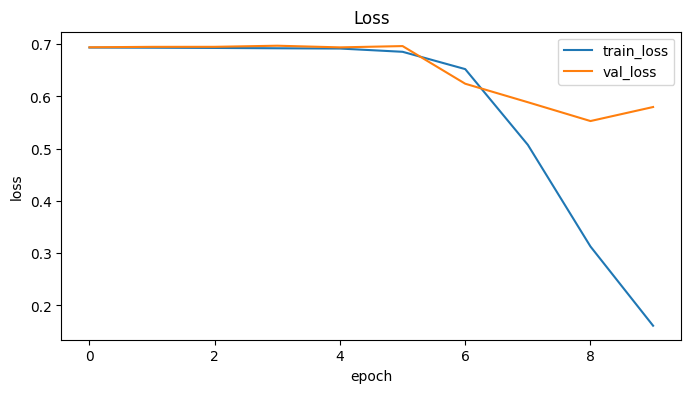

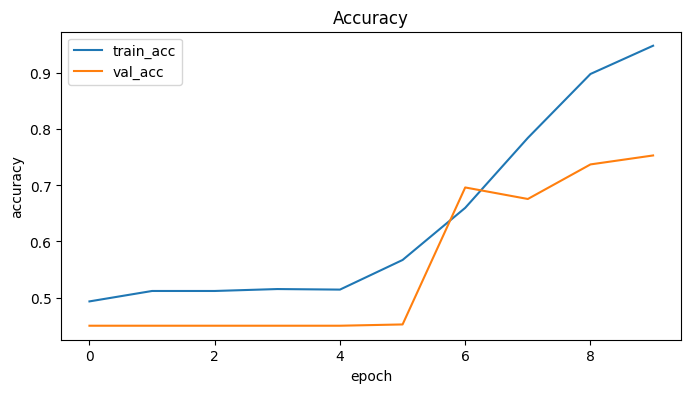

In [17]:
# Plot the thingies of validation and loss
import matplotlib.pyplot as plt

# Loss
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.title('Loss')
plt.show()

# Accuracy
plt.figure(figsize=(8,4))
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()


In [19]:
# Evaluate trained model on the test set using sklearn metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score

# Change the probabilities to the binary predictions
probs = best_model.predict(test_seq)
y_pred = (probs.ravel() >= 0.5).astype(int)

# Make the metrics
acc = accuracy_score(test_y, y_pred)
prec = precision_score(test_y, y_pred, zero_division=0)
rec = recall_score(test_y, y_pred, zero_division=0)
f1 = f1_score(test_y, y_pred, zero_division=0)
kappa = cohen_kappa_score(test_y, y_pred)

print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1-score:  {f1:.4f}")
print(f"Cohen kappa: {kappa:.4f}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Accuracy:  0.7585
Precision: 0.8232
Recall:    0.6682
F1-score:  0.7376
Cohen kappa: 0.5184
Accuracy:  0.7585
Precision: 0.8232
Recall:    0.6682
F1-score:  0.7376
Cohen kappa: 0.5184
